# downloading Data

In [34]:
!git clone https://github.com/imadegunawinangun/Autonomous-Car-CNN-Model

Cloning into 'Autonomous-Car-CNN-Model'...
remote: Enumerating objects: 179198, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 179198 (delta 0), reused 0 (delta 0), pack-reused 179195
Receiving objects: 100% (179198/179198), 2.59 GiB | 37.38 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [1]:
!git clone https://github.com/imadegunawinangun/final-track

Cloning into 'final-track'...
remote: Enumerating objects: 42135, done.
remote: Total 42135 (delta 0), reused 0 (delta 0), pack-reused 42135
Receiving objects: 100% (42135/42135), 531.62 MiB | 36.40 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (42135/42135), done.


In [2]:
!ls final-track/final

track1	track2


# Import Library



In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random
!pip3 install imgaug
import tensorflow as tf


# Rename Pathfile

In [4]:
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']

In [5]:
datadir1 = 'final-track/final/track1'
data1 = pd.read_csv(os.path.join(datadir1, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
data1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


center  ...     speed
0  C:\Users\2E64AEB8448F\Desktop\final\track1\IMG\center_2021_07_20_19_46_02_347.jpg  ...  10.70280
1  C:\Users\2E64AEB8448F\Desktop\final\track1\IMG\center_2021_07_20_19_46_02_415.jpg  ...  11.35815
2  C:\Users\2E64AEB8448F\Desktop\final\track1\IMG\center_2021_07_20_19_46_02_482.jpg  ...  12.10183
3  C:\Users\2E64AEB8448F\Desktop\final\track1\IMG\center_2021_07_20_19_46_02_551.jpg  ...  12.93047
4  C:\Users\2E64AEB8448F\Desktop\final\track1\IMG\center_2021_07_20_19_46_02_618.jpg  ...  13.34923

[5 rows x 7 columns]

In [6]:
datadir2 = 'final-track/final/track2'
data2 = pd.read_csv(os.path.join(datadir2, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
data2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


center  ...     speed
0  C:\Users\2E64AEB8448F\Desktop\final\track2\IMG\center_2021_07_20_20_08_24_044.jpg  ...  21.76823
1  C:\Users\2E64AEB8448F\Desktop\final\track2\IMG\center_2021_07_20_20_08_24_112.jpg  ...  22.57266
2  C:\Users\2E64AEB8448F\Desktop\final\track2\IMG\center_2021_07_20_20_08_24_179.jpg  ...  23.18514
3  C:\Users\2E64AEB8448F\Desktop\final\track2\IMG\center_2021_07_20_20_08_24_247.jpg  ...  23.75984
4  C:\Users\2E64AEB8448F\Desktop\final\track2\IMG\center_2021_07_20_20_08_24_315.jpg  ...  24.53874

[5 rows x 7 columns]

In [7]:
data = pd.concat([data1, data2], ignore_index=True, sort=False)


In [8]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail

In [9]:
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data

center  ...     speed
0      center_2021_07_20_19_46_02_347.jpg  ...  10.70280
1      center_2021_07_20_19_46_02_415.jpg  ...  11.35815
2      center_2021_07_20_19_46_02_482.jpg  ...  12.10183
3      center_2021_07_20_19_46_02_551.jpg  ...  12.93047
4      center_2021_07_20_19_46_02_618.jpg  ...  13.34923
...                                   ...  ...       ...
14039  center_2021_07_20_20_22_23_400.jpg  ...  30.19049
14040  center_2021_07_20_20_22_23_468.jpg  ...  30.19024
14041  center_2021_07_20_20_22_23_536.jpg  ...  30.19029
14042  center_2021_07_20_20_22_23_603.jpg  ...  30.19015
14043  center_2021_07_20_20_22_23_690.jpg  ...  30.19045

[14044 rows x 7 columns]

# Data Visualisation

total data: 14044


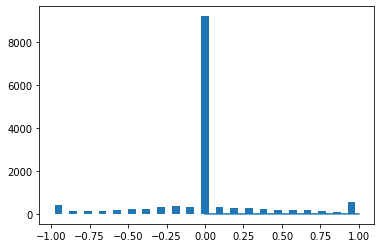

In [10]:
num_bins = 21
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])))
print('total data:', len(data))


# Data Split for Testing

Training Samples: 10533
Valid Samples: 3511


Text(0.5, 1.0, 'Test set')

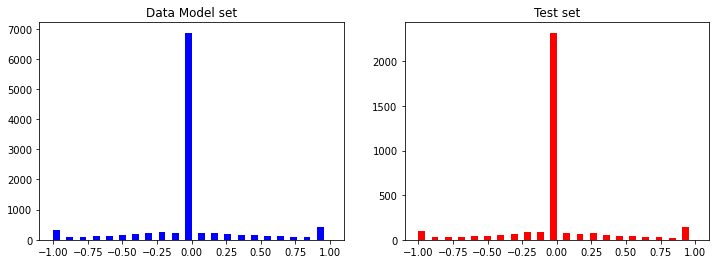

In [11]:
data_model, data_test = train_test_split(data,test_size=0.25,random_state=2)
print('Training Samples: {}\nValid Samples: {}'.format(len(data_model), len(data_test)))
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(data_model['steering'], bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Data Model set')
axes[1].hist(data_test['steering'], bins=num_bins, width=0.05, color='red')
axes[1].set_title('Test set')

In [12]:
data_model = data_model.reset_index()
data_model_ = data_model.drop(columns='index')

In [13]:
data_test = data_test.reset_index()
data_test_ = data_test.drop(columns='index')

# Data Balancing

In [14]:
def data_balancing(data, num_bins, samples_per_bin, center, bins ):
  print('total data:', len(data))
  remove_list = []
  for j in range(num_bins):
    list_ = []
    for i in range(len(data['steering'])):
      if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
        #data['steering'][i] = center[j]
        list_.append(i)

    list_ = shuffle(list_)
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)
  print('removed:', len(remove_list))
  data_=data.copy()
  data_.drop(data_.index[remove_list], inplace=True)
  print('remaining:', len(data_))
  return data_

total data: 10533
removed: 4867
remaining: 5666


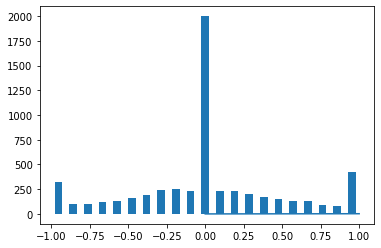

In [15]:
df = data_balancing(data_model_, num_bins, 2000, center, bins)
hist, _ = np.histogram(df['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(df['steering']), np.max(df['steering'])))

# Load Image + Steering


In [16]:
df.iloc[0]

center      center_2021_07_20_19_56_28_680.jpg
left        left_2021_07_20_19_56_28_680.jpg  
right       right_2021_07_20_19_56_28_680.jpg 
steering    0                                 
throttle    1                                 
reverse     0                                 
speed       30.1866                           
Name: 1, dtype: object

In [17]:
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(df)):
    indexed_data = df.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    if os.path.exists(os.path.join(datadir, center.strip())):
      image_path.append(os.path.join(datadir, center.strip()))
      steering.append(float(indexed_data[3]))
    # left image append
    if os.path.exists(os.path.join(datadir, left.strip())):
      image_path.append(os.path.join(datadir,left.strip()))
      steering.append(float(indexed_data[3])+0.2)
    # right image append
    if os.path.exists(os.path.join(datadir, right.strip())):
      image_path.append(os.path.join(datadir,right.strip()))
      steering.append(float(indexed_data[3])-0.2)
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

In [18]:
image_paths1, steerings1 = load_img_steering(datadir1 + '/IMG', df)


In [19]:
image_paths2, steerings2 = load_img_steering(datadir2 + '/IMG', df)


In [20]:
image_paths = np.append(image_paths1,image_paths2)
steerings = np.append(steerings1,steerings2)
#image_paths = image_paths1
#steerings = steerings1
print(image_paths.shape)

(16998,)


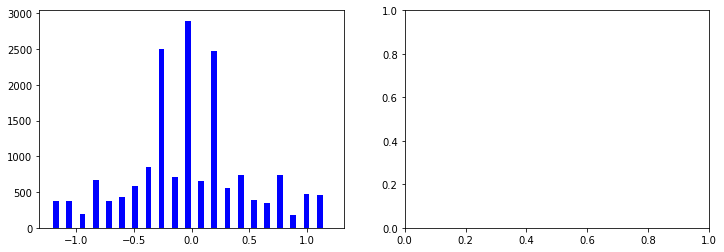

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(steerings, bins=num_bins, width=0.05, color='blue');

# Training & Validation Split

Training Samples: 12748
Valid Samples: 4250


Text(0.5, 1.0, 'Validation set')

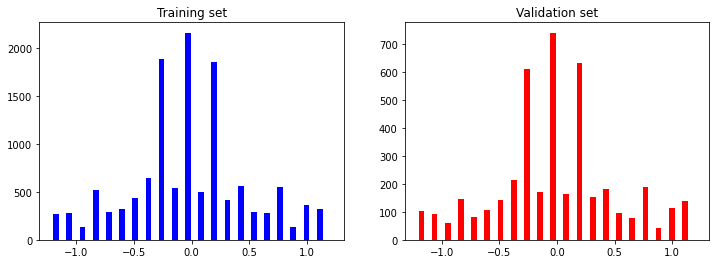

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings,test_size=0.25,random_state=2)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

# Augmentation

In [23]:
def zoom(image):
  zoom = iaa.Affine(scale=(0.95, 1.3))
  image = zoom.augment_image(image)
  return image
def pan(image):
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1))
    image = brightness.augment_image(image)
    return image
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle
def random_shadow(img):
    ht, wd , ch = img.shape
    x1, y1 = wd * np.random.rand(), 0
    x2, y2 = wd * np.random.rand(), ht
    xm, ym = np.mgrid[0:ht, 0:wd]
    
    mask = np.zeros_like(img[:, :, 1])
    mask[(ym - y1) * (x2 - x1) - (y2 - y1) * (xm - x1) > 0] = 1

    cond = mask == np.random.randint(2)
    s_ratio = np.random.uniform(low=0.6, high=0.9)
    
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    hls[:, :, 1][cond] = hls[:, :, 1][cond] * s_ratio
    image = cv2.cvtColor(hls, cv2.COLOR_HLS2RGB)
    return image

Text(0.5, 1.0, 'Shadowed Image')

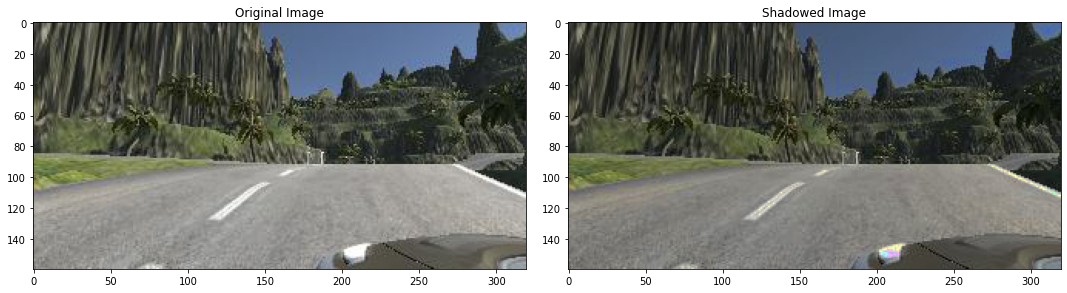

In [24]:
image = image_paths[random.randint(0, len(X_train))]
original_image = mpimg.imread(image)
shadow_image = random_shadow(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(shadow_image)
axs[1].set_title('Shadowed Image')

Text(0.5, 1.0, 'Zoomed Image - Steering Angle:-0.30000010000000005')

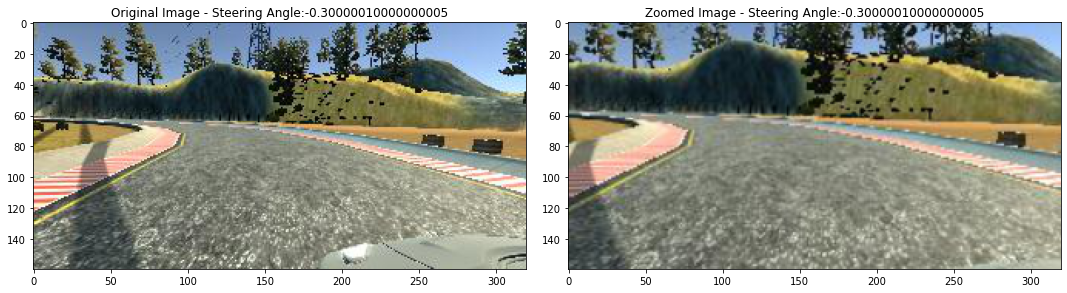

In [25]:
random_index = random.randint(0, len(df)-1)
image = image_paths[random_index]
steering_angle = steerings[random_index]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))
 
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image - ' + 'Steering Angle:' + str(steering_angle))

Text(0.5, 1.0, 'Panned Image - Steering Angle:-0.45')

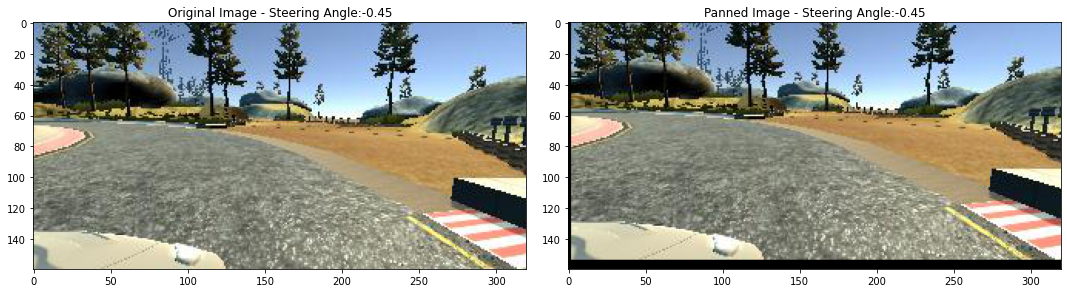

In [26]:
random_index = random.randint(0, len(df)-1)
image = image_paths[random_index]
steering_angle = steerings[random_index]
original_image = mpimg.imread(image)
panned_image = pan(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))
 
axs[1].imshow(panned_image)
axs[1].set_title('Panned Image - ' + 'Steering Angle:' + str(steering_angle))

Text(0.5, 1.0, 'Brightness altered Image - Steering Angle:-0.8')

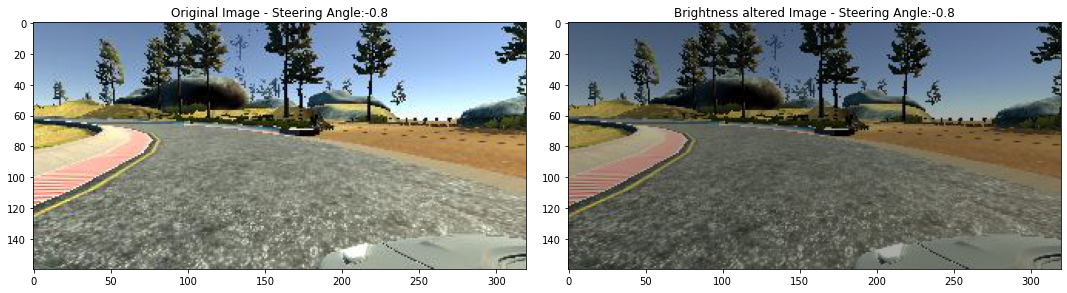

In [27]:
random_index = random.randint(0, len(df)-1)
image = image_paths[random_index]
steering_angle = steerings[random_index]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)
steering_angle = steerings[random_index]
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))
 
axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered Image - ' + 'Steering Angle:' + str(steering_angle))

Text(0.5, 1.0, 'Flipped Image - Steering Angle:0.25')

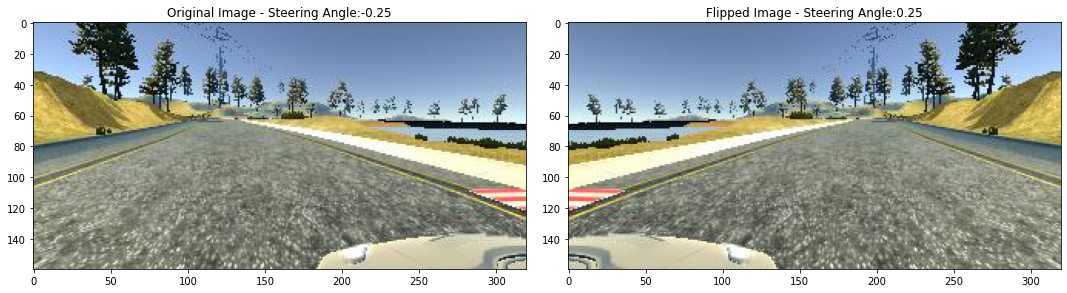

In [28]:
random_index = random.randint(0, len(df)-1)
image = image_paths[random_index]
steering_angle = steerings[random_index]
 
 
original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))
 
axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))

In [29]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, steering_angle = img_random_flip(image, steering_angle)
    if np.random.rand() < 0.5:
      image = random_shadow(image)
    
    return image, steering_angle

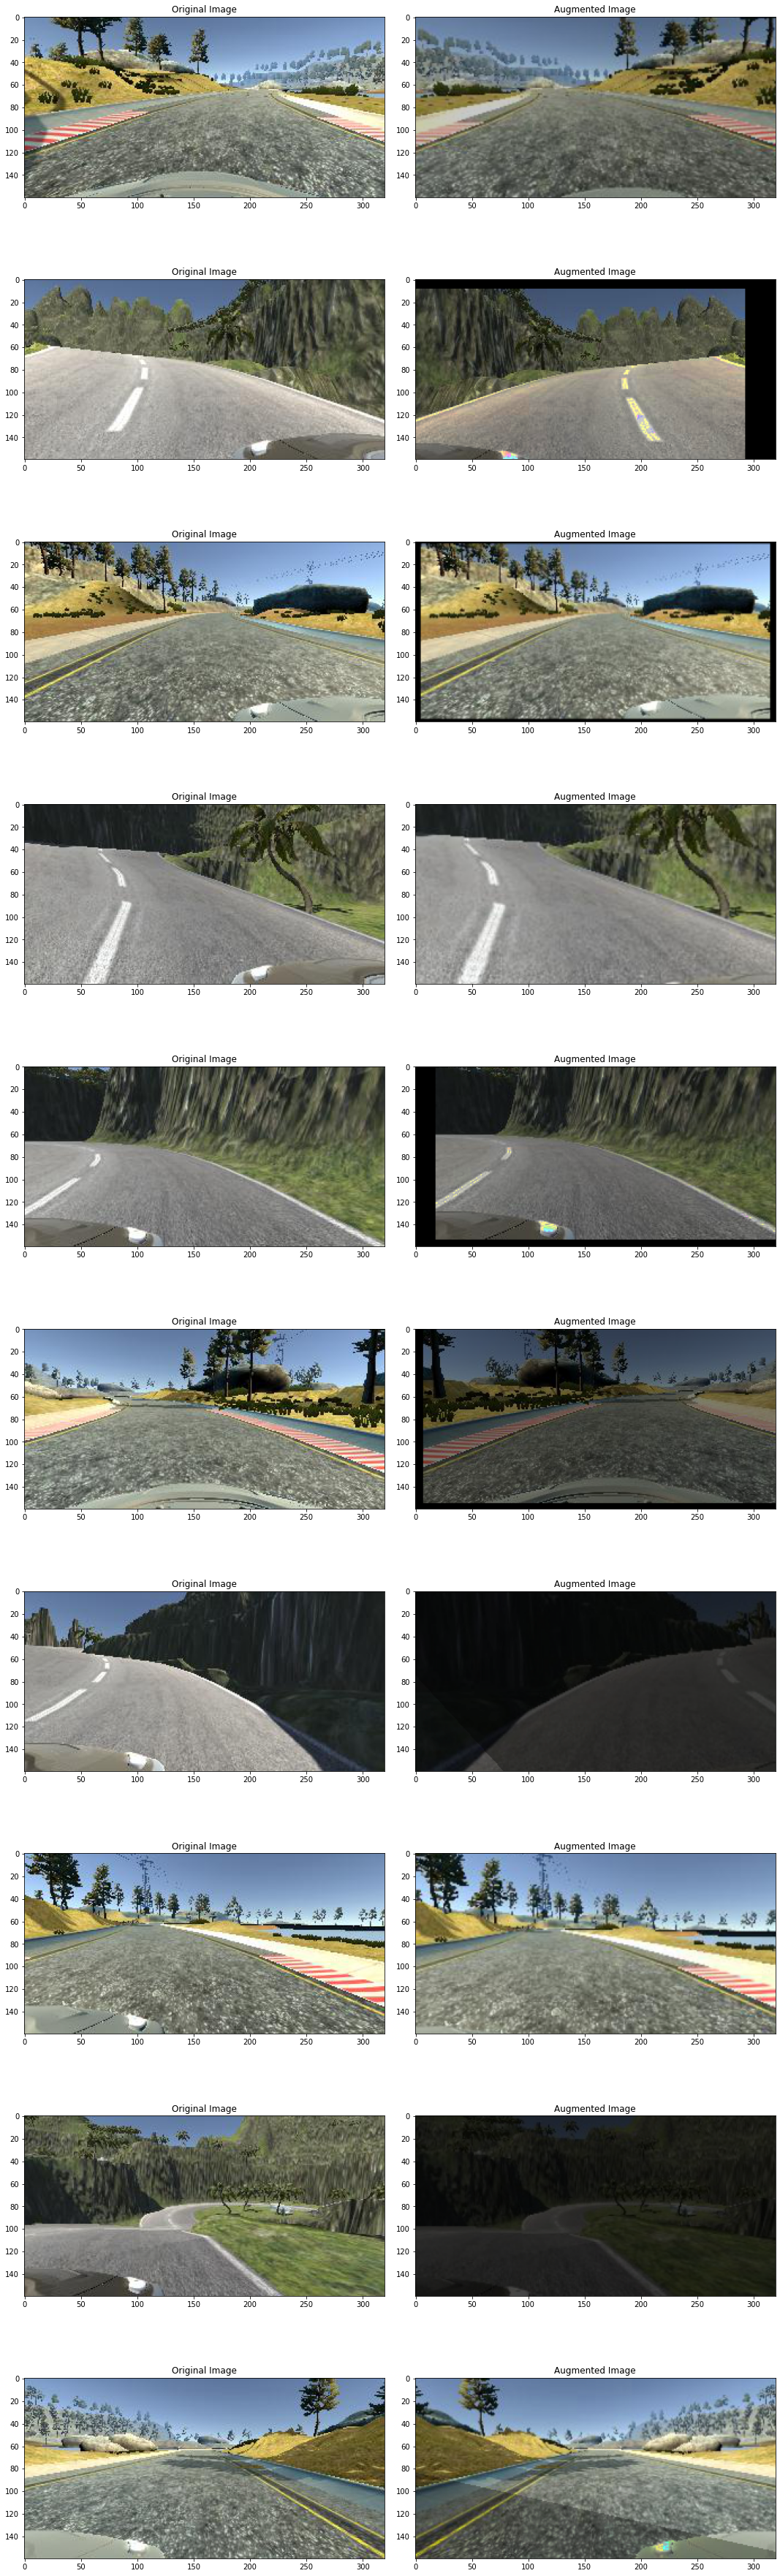

In [30]:
ncol = 2
nrow = 10
 
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()
 
for i in range(10):
  randnum = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[randnum]
  random_steering = steerings[randnum]
    
  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)
    
  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")
  
  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")

In [31]:
def img_preprocess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)

    img = cv2.resize(img, (200, 66))

    img = img/255
    return img

Text(0.5, 1.0, 'Preprocessed Image')

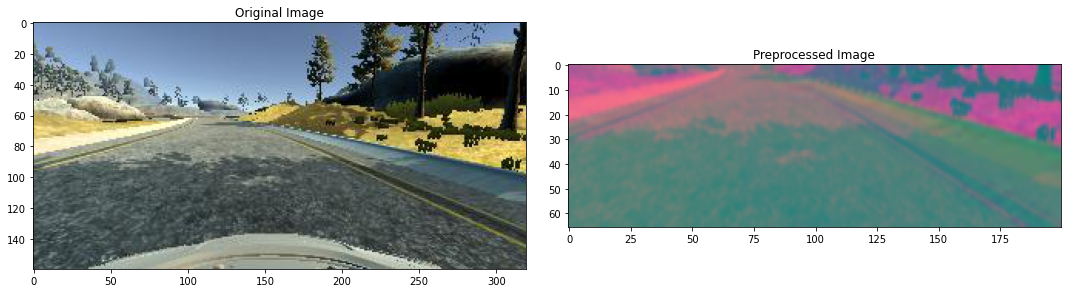

In [32]:
image = image_paths[1221]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [33]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      
      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
     
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]
      
      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))  

Text(0.5, 1.0, 'Validation Image -0.5')

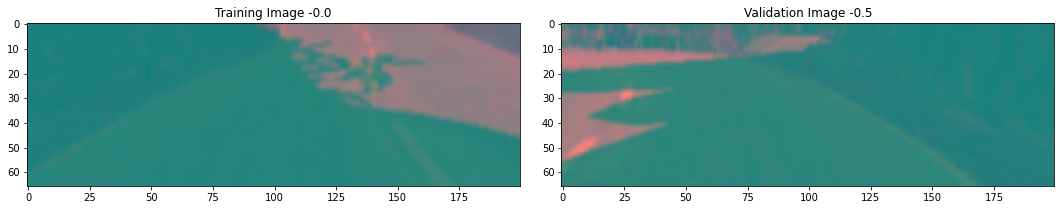

In [ ]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image {}'.format(y_train_gen[0]))
 
axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image {}'.format(y_valid_gen[0]))

In [ ]:
def nvidia_model():
  model = Sequential()
  model.add(Conv2D(24, 5, 2, input_shape=(66, 200, 3), activation='elu'))
  model.add(Conv2D(36, 5, 2, activation='elu'))
  model.add(Conv2D(48, 5, 2, activation='elu'))
  model.add(Conv2D(64, 3, activation='elu'))
  
  model.add(Conv2D(64, 3, activation='elu'))
#   model.add(Dropout(0.5))
  
  
  model.add(Flatten())
  
  model.add(Dense(100, activation = 'elu'))
#   model.add(Dropout(0.5))
  
  model.add(Dense(50, activation = 'elu'))
#   model.add(Dropout(0.5))
  
  model.add(Dense(10, activation = 'elu'))
#   model.add(Dropout(0.5))
 
  model.add(Dense(1))
  
  optimizer = Adam(lr=1e-4)
  model.compile(loss='mse', optimizer=optimizer)
  return model

In [ ]:
model = nvidia_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               1

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
batch_size = 100
history = model.fit(batch_generator(X_train, y_train, batch_size, 1),
                    validation_data=batch_generator(X_valid, y_valid, batch_size, 0),
                    epochs=10,
                    steps_per_epoch=len(X_train)*10/batch_size, 
                    validation_steps=len(X_valid)*3/batch_size,

                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(
                        monitor='val_loss',
                        patience=3,
                        restore_best_weights=True
                        )
                    ])


Epoch 1/10
1274/1274 [==============================] - 807s 600ms/step - loss: 0.2036 - val_loss: 0.1386
Epoch 2/10
1274/1274 [==============================] - 760s 597ms/step - loss: 0.1546 - val_loss: 0.1319
Epoch 3/10
1274/1274 [==============================] - 763s 599ms/step - loss: 0.1372 - val_loss: 0.1121
Epoch 4/10
1274/1274 [==============================] - 764s 599ms/step - loss: 0.1235 - val_loss: 0.0997
Epoch 5/10
1274/1274 [==============================] - 757s 594ms/step - loss: 0.1165 - val_loss: 0.0892
Epoch 6/10
1274/1274 [==============================] - 746s 585ms/step - loss: 0.1130 - val_loss: 0.0889
Epoch 7/10
1274/1274 [==============================] - 746s 586ms/step - loss: 0.1074 - val_loss: 0.0870
Epoch 8/10
1274/1274 [==============================] - 748s 587ms/step - loss: 0.1047 - val_loss: 0.0874
Epoch 9/10
1274/1274 [==============================] - 755s 593ms/step - loss: 0.1021 - val_loss: 0.0829
Epoch 10/10
1274/1274 [=======================

Text(0.5, 0, 'Epoch')

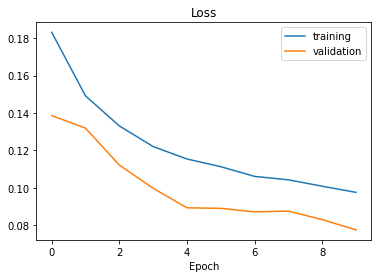

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')


In [42]:
model.save('model.h5')
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
test_image_paths1, test_steerings1 = load_img_steering(datadir1 + '/IMG', data_test_)
test_image_paths2, test_steerings2 = load_img_steering(datadir2 + '/IMG', data_test_)
test_image_paths = np.append(test_image_paths1,test_image_paths2)
test_steerings = np.append(test_steerings1,test_steerings2)
#image_paths = image_paths1
#steerings = steerings1
print(test_image_paths.shape)

(10533,)


In [39]:
!ls Autonomous-Car-CNN-Model

 128572_format-Proceeding.docx
 drive.py
'model - 2021-07-27T015318.277.h5'
'Proceeding 07111740000050.pdf'
'Rancang Bangun Model Deep Learning ipynb.ipynb'
'RANCANG BANGUN MODEL DEEP LEARNING PADA SISTEM NAVIGASI MOBIL OTONOM DENGAN SENSOR KAMERA.pdf'
'Rancang Bangun Model Deep Learning.py'
 README.md


In [38]:
model = keras.models.load_model('Autonomous-Car-CNN-Model/model - 2021-07-27T015318.277.h5')

In [44]:
test_batch_size = 100
model.evaluate(batch_generator(test_image_paths, test_steerings, test_batch_size, 0), steps = len(test_steerings)/test_batch_size)

105/105 [==============================] - 63s 223ms/step - loss: 0.0654


0.06542757898569107